In [1]:
import requests
url = "http://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search/query/pubid:(17446270)"

try:
    httpReq = requests.get(url, proxies=None)
except NameError:
    httpReq = requests.get(url)
ans = httpReq.text

In [3]:
print(ans)

uniprotkb:P0CW72	uniprotkb:P0CW72	intact:EBI-2620133|uniprotkb:Q777A5	intact:EBI-2620133|uniprotkb:Q777A5	psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)	psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)	psi-mi:"MI:0397"(two hybrid array)	Calderwood et al. (2007)	pubmed:17446270|imex:IM-20435|mint:MINT-6769080	taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")	taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")	psi-mi:"MI:0915"(physical association)	psi-mi:"MI:0469"(IntAct)	intact:EBI-2620961|imex:IM-20435-3	author score:+|intact-miscore:0.51
uniprotkb:P14348	uniprotkb:P0C704	intact:EBI-2620158|intact:EBI-9645437|uniprotkb:Q777G5	intact:EBI-2620975|uniprotkb:Q3KSQ5	psi-mi:scp_ebvb9(display_long)|uniprotkb:SCP(gene nam

In [16]:
import re

def mitabReader(httpText):
    for line in ans.split("\n"):
        _ = line.split("\t")
        if len(_) > 1 and _[0].startswith("uniprotkb:")\
                      and _[1].startswith("uniprotkb:"):
            yield [ _[0].replace("uniprotkb:", ""),\
                    _[1].replace("uniprotkb:", "") ]\
                  + _[2:]
 
            
def isMitab_EBV_EBV(mitabArray):
    reEBV   = "taxid:(1037[6-7]|82830)"
    if re.search(reEBV, mitabArray[9]) and re.search(reEBV, mitabArray[10]):
        return True
    return False

def isMitab_Human_EBV(mitabLine):
    reEBV   = "taxid:(1037[6-7]|82830)"
    reHuman   = "taxid:9606"
    if (re.search(reEBV, mitabLine[9]) and re.search(reHuman, mitabLine[10])) or (re.search(reHuman, mitabLine[9]) and re.search(reEBV, mitabLine[10])):
        return True
    return False


EBV_EBV_mitab   = []
EBV_Human_mitab = []
total = 0
for mitabArray in mitabReader(ans):
    total += 1
    if isMitab_EBV_EBV(mitabArray):
        EBV_EBV_mitab.append(mitabArray)
    elif isMitab_Human_EBV(mitabArray):
        EBV_Human_mitab.append(mitabArray)
    else : 
        raise ValueError("Je ne connais pas cette espece ==> ", mitabArray[9:11])

print(f"Nombre total d'interactions {total}, EBV-EBV {len(EBV_EBV_mitab)}, EBV-Human {len(EBV_Human_mitab)}")

Nombre total d'interactions 230, EBV-EBV 59, EBV-Human 171


In [5]:
it = mitabReader(ans)
for l in it:
    print(l)
    
mitab_list = [d for d in mitabReader(ans)]

['P0CW72', 'P0CW72', 'intact:EBI-2620133|uniprotkb:Q777A5', 'intact:EBI-2620133|uniprotkb:Q777A5', 'psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)', 'psi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)', 'psi-mi:"MI:0397"(two hybrid array)', 'Calderwood et al. (2007)', 'pubmed:17446270|imex:IM-20435|mint:MINT-6769080', 'taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")', 'taxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")', 'psi-mi:"MI:0915"(physical association)', 'psi-mi:"MI:0469"(IntAct)', 'intact:EBI-2620961|imex:IM-20435-3', 'author score:+|intact-miscore:0.51']
['P14348', 'P0C704', 'intact:EBI-2620158|intact:EBI-9645437|uniprotkb:Q777G5', 'intact:EBI-2620975|uniprotkb:Q3KSQ5', 'psi-mi:scp_ebvb9(display_long)|un

In [17]:
prot_EBV=set()
prot_Human=set()

def isprot_EBV(mitabid):
    reEBV   = "taxid:(1037[6-7]|82830)"
    if re.search(reEBV, mitabid):
        return True
    return False

for mitabArray in EBV_Human_mitab:
    species_A = mitabArray[9]
    if isprot_EBV(species_A):
        prot_EBV.add(mitabArray[0])
        prot_Human.add(mitabArray[1])
    else:
        prot_Human.add(mitabArray[0])
        prot_EBV.add(mitabArray[1])
    
print(len(prot_EBV))
print(len(prot_Human))

41
113


In [11]:
prot_EBV=set()

for mitabArray in EBV_EBV_mitab:
    prot_EBV.add(mitabArray[0])
    prot_EBV.add(mitabArray[1])
print(len(prot_EBV))

48


## Construction du réseau d'interactions EBV/EBV

In [18]:
import networkx as nx
G = nx.Graph()

In [23]:
G.add_edge("a","b", weight=12, scope="book")
G.add_edge("b","c")

In [24]:
G["a"]["b"]['scope']

'book'

In [25]:
G.edges()

EdgeView([('a', 'b'), ('b', 'c')])

In [26]:
G.nodes()

NodeView(('a', 'b', 'c'))

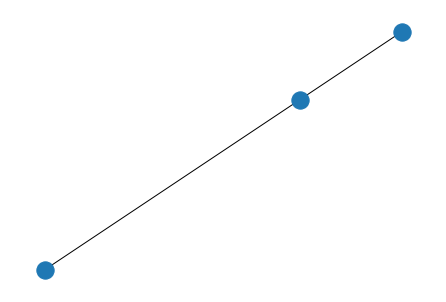

In [27]:
nx.draw(G,node_color=["blue","blue","red"]) # same order as G.nodes()

In [28]:
G_ebv = nx.Graph()

for mitabArray in EBV_EBV_mitab:
    G_ebv.add_edge(mitabArray[0],mitabArray[1])

In [30]:
G_ebv.edges()

EdgeView([('P0CW72', 'P0CW72'), ('P0CW72', 'Q3KSU8'), ('P0CW72', 'P0C6Z4'), ('P0CW72', 'P03208'), ('P0CW72', 'P14348'), ('P14348', 'P0C704'), ('P0C704', 'Q3KSU5'), ('P0C704', 'A8CSJ8'), ('P0CK47', 'P03185'), ('A0A0C7TRZ7', 'P0CK53'), ('P0C731', 'Q3KSQ2'), ('Q3KSQ2', 'Q3KST0'), ('Q3KSQ2', 'P03208'), ('Q3KSQ2', 'P03209'), ('Q66542', 'Q3KST5'), ('Q66542', 'P0C701'), ('Q3KSS4', 'Q3KSS4'), ('Q3KSS4', 'P03208'), ('Q3KSS4', 'Q69119'), ('Q3KSP5', 'Q3KSP5'), ('Q3KSP5', 'P03209'), ('Q3KSU1', 'Q3KSU1'), ('Q3KSU8', 'Q3KSU8'), ('P03206', 'Q3KSV2'), ('Q3KSV2', 'P03225'), ('Q3KSV2', 'Q3KST2'), ('Q3KST2', 'Q3KST2'), ('Q3KST2', 'Q69119'), ('Q3KSU5', 'P0CK58'), ('Q3KSS5', 'P0C729'), ('P03208', 'P03232'), ('P0C738', 'Q69131'), ('P0CK58', 'Q1HVC7'), ('Q3KSR9', 'P0CK49'), ('P0C6Z5', 'P0C734'), ('A8CSJ8', 'Q3KSS3'), ('A8CSJ8', 'P0C6Z4'), ('A8CSJ8', 'P03199'), ('P68343', 'P0CK51'), ('Q69139', 'P03199'), ('Q69139', 'Q3KSU3'), ('P0C762', 'Q3KST1'), ('Q3KST1', 'Q1HVD6'), ('P0C733', 'Q1HVD6')])

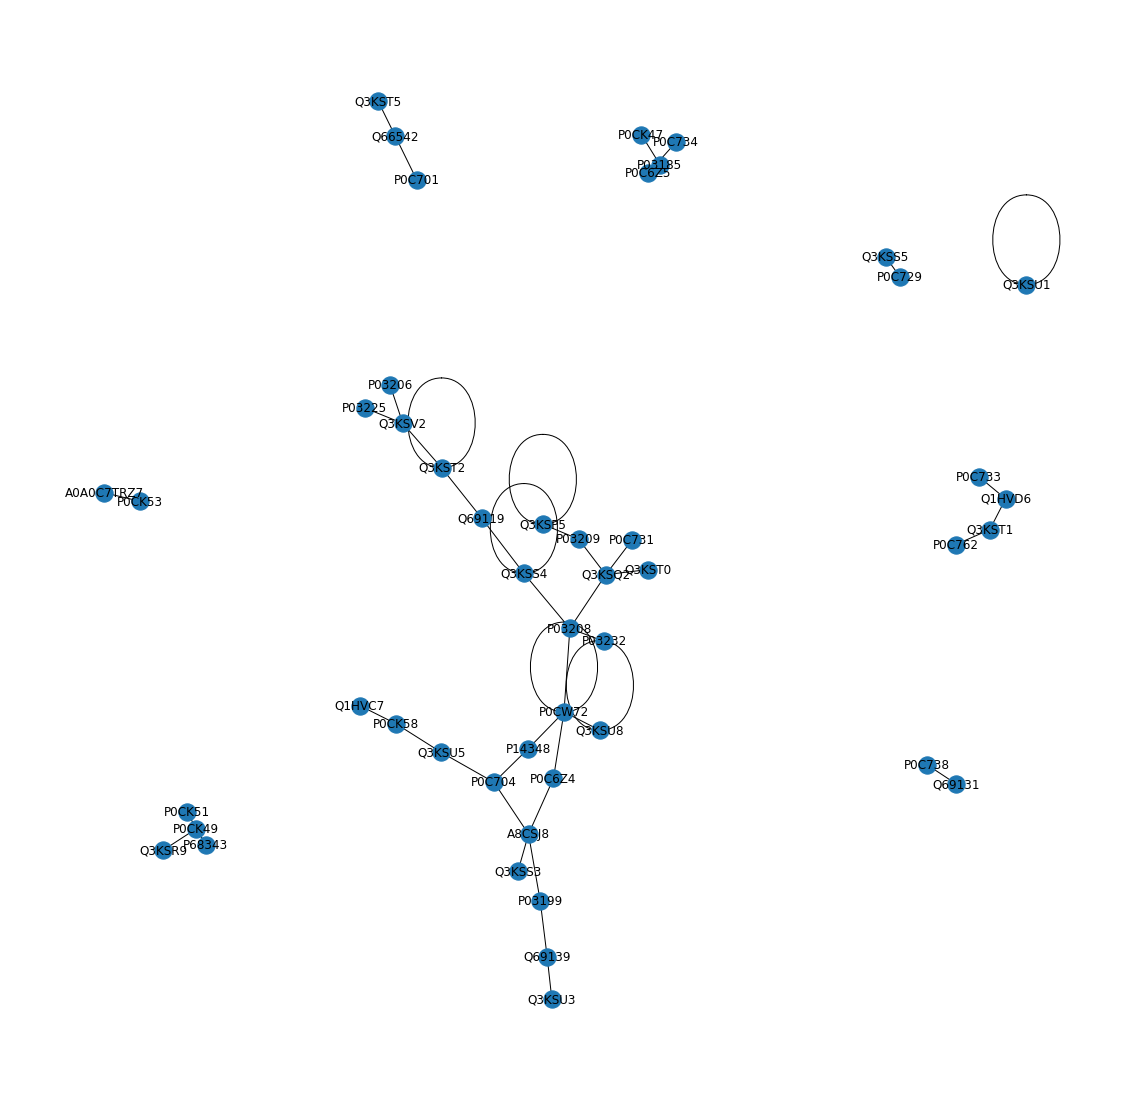

In [33]:
from matplotlib import pyplot as plt
fig,host_ax=plt.subplots(figsize=(20,20))
host_ax.set_axis_off()
nx.draw(G_ebv, ax=host_ax, with_labels=True)

In [34]:
G_ebv_h = nx.Graph()

for mitabArray in EBV_Human_mitab:
    G_ebv_h.add_edge(mitabArray[0],mitabArray[1])

In [54]:
col=[]
for n in G_ebv_h.nodes:
    if n in prot_Human:
        col.append("pink")
    else:
        col.append("yellow")
print(col)

['yellow', 'pink', 'pink', 'yellow', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'yellow', 'pink', 'pink', 'pink', 'pink', 'yellow', 'pink', 'pink', 'pink', 'yellow', 'yellow', 'pink', 'pink', 'yellow', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'yellow', 'yellow', 'yellow', 'pink', 'yellow', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'yellow', 'pink', 'yellow', 'pink', 'pink', 'pink', 'pink', 'pink', 'yellow', 'pink', 'pink', 'pink', 'yellow', 'pink', 'pink', 'yellow', 'pink', 'pink', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'yellow', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'yellow', 'yellow', 'pink', 'yellow', 'pink', 'pink', 'pink', 'pink', 'pink', 'yellow', 'pink', 'pink', 'pink', 'yellow', 'yellow', 'pi

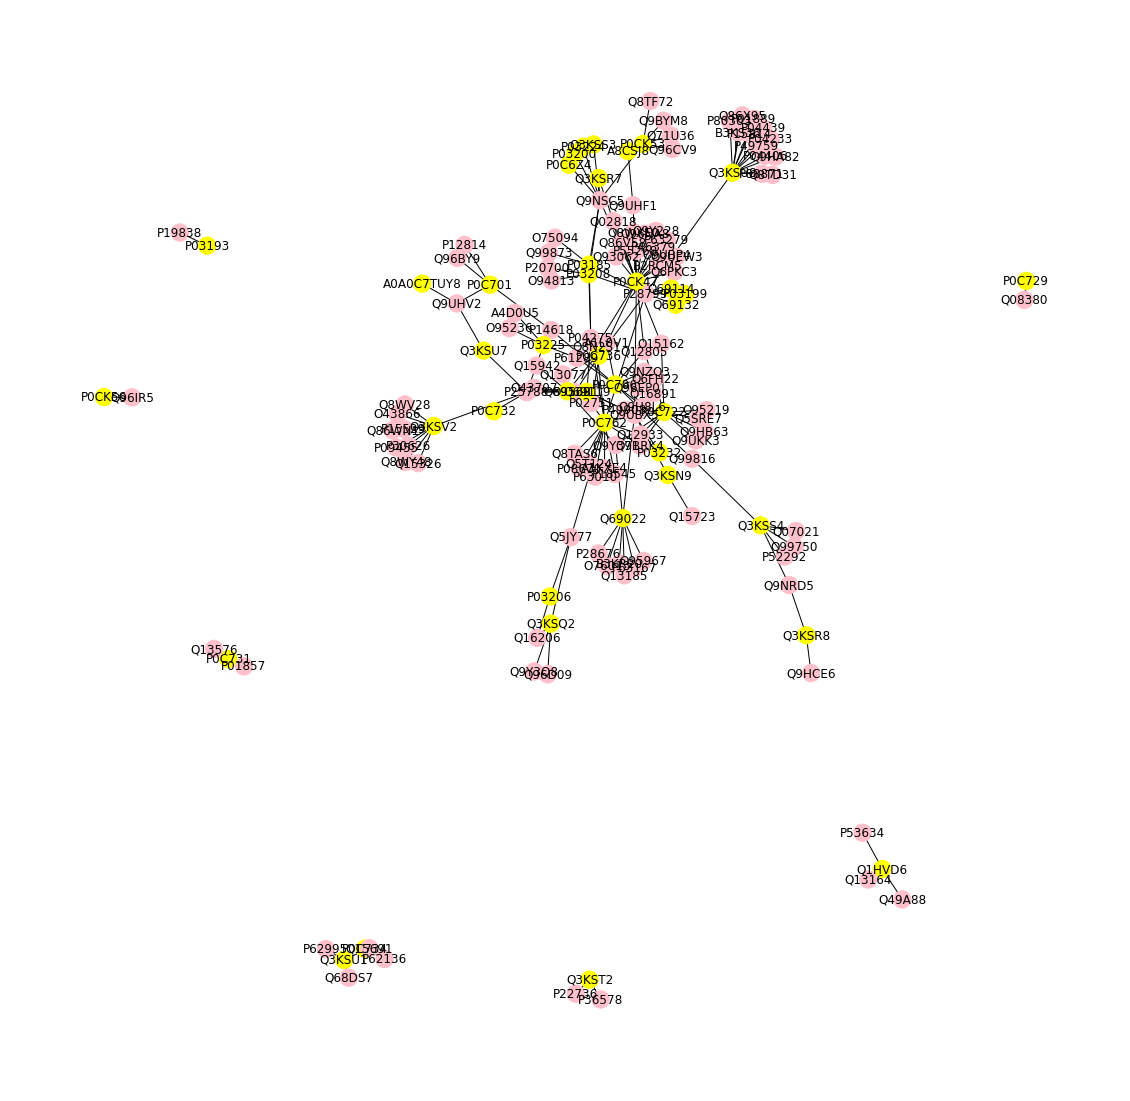

In [55]:
fig,host_ax=plt.subplots(figsize=(20,20))
host_ax.set_axis_off()
nx.draw(G_ebv_h, ax=host_ax, with_labels=True, node_color=col)

In [52]:
pos = nx.spring_layout(G_ebv_h,k=0.2)

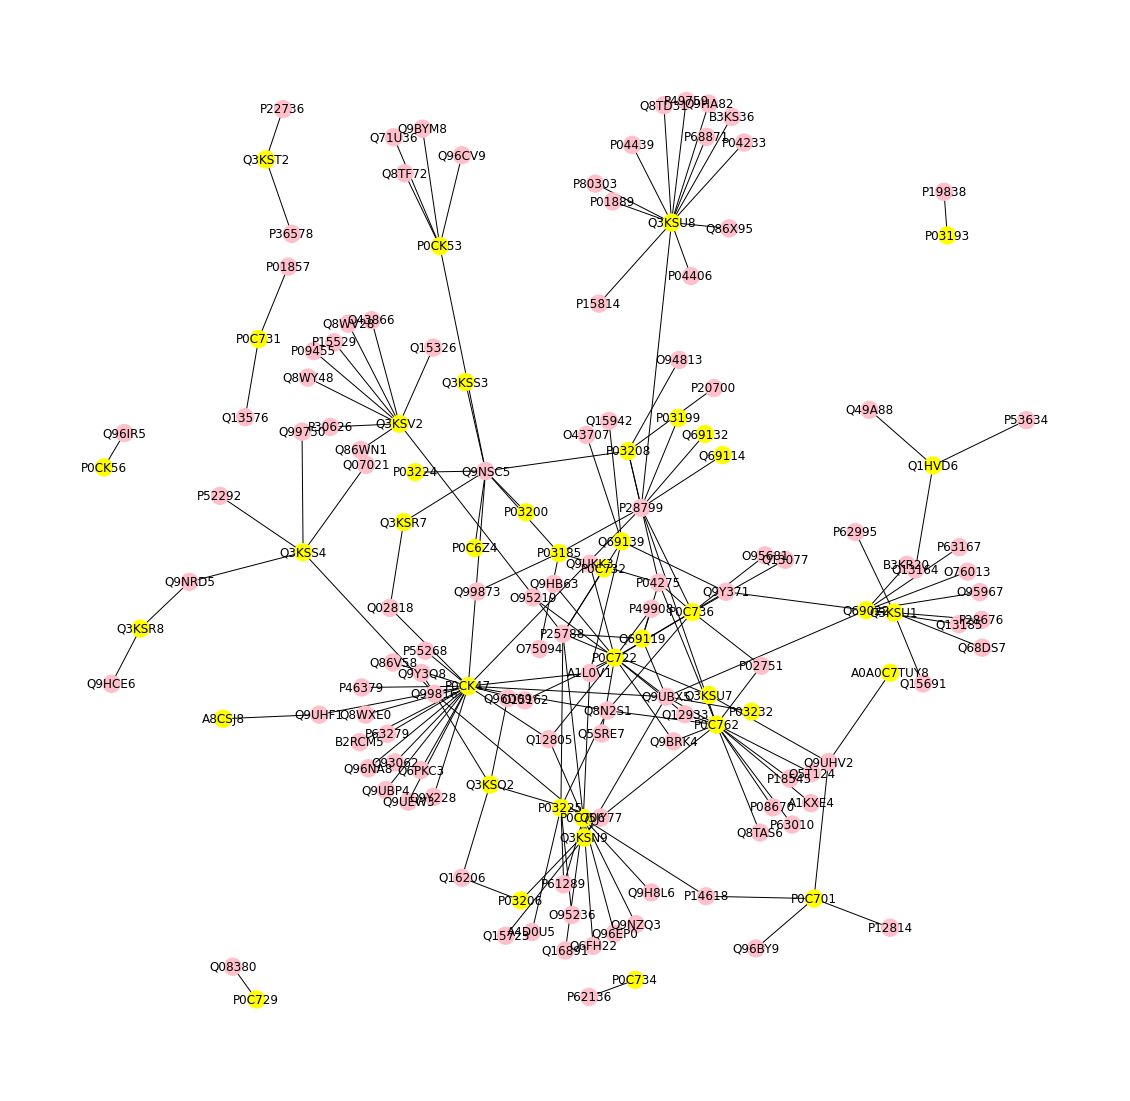

In [56]:
fig,host_ax=plt.subplots(figsize=(20,20))
host_ax.set_axis_off()
nx.draw(G_ebv_h, ax=host_ax, pos=pos, node_color=col, with_labels=True)